In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from pathlib import Path
from random import randrange

In [11]:
data_dir = Path("../Data/weather/")
df = pd.read_pickle(data_dir / "USWeatherData2011To2020.bz2")
df.sample(n=10)

,WBANNO,STATE,SITE,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LATITUDE,LONGITUDE,ELEVATION,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG
2428048,54851,OH,Coshocton,237.0,100.0,236.0,2000.0,40.37,-81.78,298.829987,24.6,0.0,20.2,46.0
11738920,54856,OH,Wooster,351.0,1900.0,351.0,1400.0,40.76,-81.91,322.230011,-1.7,83.0,-1.1,85.0
13147993,54808,IL,Champaign,235.0,400.0,234.0,2200.0,40.05,-88.37,214.070007,16.5,0.0,15.0,92.0
5198289,4139,NV,Denio,132.0,1100.0,132.0,300.0,41.85,-119.64,2055.879883,11.1,0.0,8.4,51.0
12289053,53974,KS,Manhattan,279.0,0.0,278.0,1800.0,39.10,-96.61,357.910004,18.3,57.0,16.4,49.0
8174768,54808,IL,Champaign,349.0,700.0,349.0,100.0,40.05,-88.37,214.070007,-13.9,0.0,-16.7,74.0
3764557,3055,OK,Goodwell,238.0,900.0,238.0,300.0,36.60,-101.59,990.169983,22.3,0.0,20.7,62.0
10281813,23908,MO,Joplin,173.0,2300.0,173.0,1700.0,37.43,-94.58,285.579987,26.5,432.0,26.2,54.0
8269426,63898,IN,Bedford,267.0,900.0,267.0,400.0,38.89,-86.57,194.960007,18.4,0.0,17.5,99.0
6656667,94077,NE,Harrison,347.0,0.0,346.0,1700.0,42.42,-103.74,1364.079956,10.6,0.0,1.6,28.0


In [12]:
df.describe()

,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,LATITUDE,LONGITUDE,ELEVATION,T_HR_AVG,SOLARAD,SUR_TEMP,RH_HR_AVG
count,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06,9.966607e+06
mean,1.836333e+02,1.149431e+03,1.836309e+02,1.150080e+03,3.883050e+01,-9.780402e+01,-8.122472e+03,1.221780e+01,1.782479e+02,1.321014e+01,6.423605e+01
std,1.053764e+02,6.923109e+02,1.053750e+02,6.925319e+02,5.639024e+00,1.466703e+01,9.337500e+04,1.164920e+01,2.663337e+02,1.456243e+01,2.481766e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.590000e+01,-1.243200e+02,-1.000000e+06,-4.370000e+01,0.000000e+00,-1.790000e+02,0.000000e+00
25%,9.200000e+01,5.000000e+02,9.200000e+01,5.000000e+02,3.441000e+01,-1.089700e+02,1.048200e+02,3.900000e+00,0.000000e+00,2.600000e+00,4.600000e+01
50%,1.840000e+02,1.100000e+03,1.840000e+02,1.200000e+03,3.889000e+01,-9.806000e+01,3.556900e+02,1.310000e+01,3.000000e+00,1.310000e+01,6.800000e+01
75%,2.750000e+02,1.700000e+03,2.750000e+02,1.800000e+03,4.346000e+01,-8.596000e+01,1.071490e+03,2.110000e+01,3.050000e+02,2.260000e+01,8.600000e+01
max,3.660000e+02,2.300000e+03,3.660000e+02,2.300000e+03,4.897000e+01,-6.788000e+01,2.949520e+03,5.170000e+01,2.256000e+03,1.310000e+02,1.000000e+02


In [15]:
feature_cols = [
    "UTC_DATE",
    "UTC_TIME",
    "LST_DATE",
    "LST_TIME",
    "T_HR_AVG",
    "SOLARAD",
    "SUR_TEMP",
    "RH_HR_AVG",
]
X = df.loc[:, feature_cols]
y = df.loc[:, "LATITUDE"]
# y = df.loc[:, "LONGITUDE"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

X.shape, y.shape

((9966607, 8), (9966607,))

25.60545980712456
0.19401693661337815


<AxesSubplot:xlabel='T_HR_AVG', ylabel='TRUE_LATITUDE'>

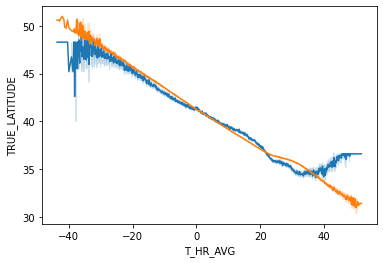

In [16]:
pipe = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

pipe.fit(X_train, y_train)
print(mean_squared_error(y_valid, pipe.predict(X_valid)))
print(r2_score(y_valid, pipe.predict(X_valid)))

df_valid = pd.DataFrame({
    "TRUE_LATITUDE": y_valid,
    "PRED_LATITUDE": pipe.predict(X_valid),
    "T_HR_AVG": X_valid["T_HR_AVG"]
})

df_valid = df_valid.round(1)

sns.lineplot(data=df_valid, x="T_HR_AVG", y="TRUE_LATITUDE")
sns.lineplot(data=df_valid, x="T_HR_AVG", y="PRED_LATITUDE")

25.605459794297648
0.19401693701713085


<AxesSubplot:xlabel='T_HR_AVG', ylabel='TRUE_LATITUDE'>

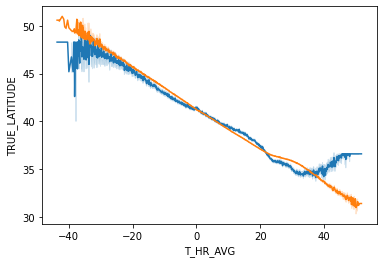

In [18]:
pipe = make_pipeline(
    StandardScaler(),
    Ridge()
)

pipe.fit(X_train, y_train)
print(mean_squared_error(y_valid, pipe.predict(X_valid)))
print(r2_score(y_valid, pipe.predict(X_valid)))

df_valid = pd.DataFrame({
    "TRUE_LATITUDE": y_valid,
    "PRED_LATITUDE": pipe.predict(X_valid),
    "T_HR_AVG": X_valid["T_HR_AVG"]
})

df_valid = df_valid.round(1)

sns.lineplot(data=df_valid, x="T_HR_AVG", y="TRUE_LATITUDE")
sns.lineplot(data=df_valid, x="T_HR_AVG", y="PRED_LATITUDE")

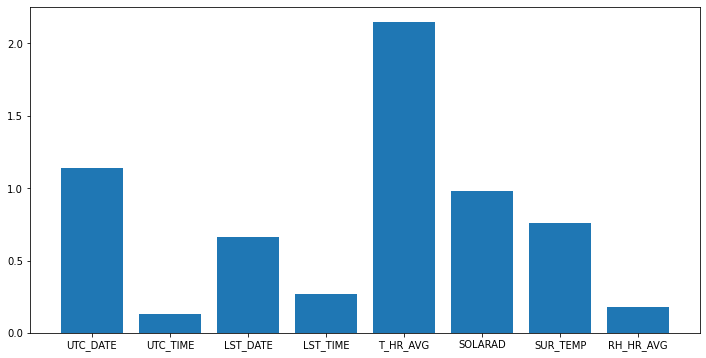

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(x=X_train.columns.values, height=abs(pipe.named_steps["ridge"].coef_));

Iteration 1, loss = 12.77326269
Iteration 2, loss = 7.67026038
Iteration 3, loss = 7.46734545
Iteration 4, loss = 7.40082921
Iteration 5, loss = 7.35806241
Iteration 6, loss = 7.33448866
Iteration 7, loss = 7.31942266
Iteration 8, loss = 7.30439451
Iteration 9, loss = 7.29133377
Iteration 10, loss = 7.28019173


/Users/ajcd2020/.miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


14.533811629194984
0.5425192084883657


<AxesSubplot:xlabel='T_HR_AVG', ylabel='TRUE_LATITUDE'>

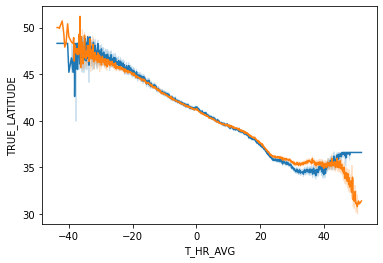

In [27]:
from sklearn.neural_network import MLPRegressor

pipe = make_pipeline(
    StandardScaler(),
    MLPRegressor(verbose=True, max_iter=10)
)

pipe.fit(X_train, y_train)
print(mean_squared_error(y_valid, pipe.predict(X_valid)))
print(r2_score(y_valid, pipe.predict(X_valid)))

df_valid = pd.DataFrame({
    "TRUE_LATITUDE": y_valid,
    "PRED_LATITUDE": pipe.predict(X_valid),
    "T_HR_AVG": X_valid["T_HR_AVG"]
})

df_valid = df_valid.round(1)

sns.lineplot(data=df_valid, x="T_HR_AVG", y="TRUE_LATITUDE")
sns.lineplot(data=df_valid, x="T_HR_AVG", y="PRED_LATITUDE")

In [23]:
from sklearn.feature_selection import RFE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

ridge = Ridge()
rfe = RFE(estimator=ridge, n_features_to_select=1, step=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_, rfe.support_

(array([4, 8, 5, 6, 1, 2, 3, 7]),
 array([False, False, False, False,  True, False, False, False]))

In [25]:
# Count number of samples for each site
df.groupby(['LATITUDE','LONGITUDE']).size().reset_index().describe()

,LATITUDE,LONGITUDE,0
count,117.000000,117.000000,117.000000
mean,38.837521,-97.726667,85184.675214
std,5.644850,14.809690,6419.113910
min,25.900000,-124.320000,36219.000000
25%,34.410000,-108.970000,85057.000000
50%,38.890000,-98.060000,87367.000000
75%,43.270000,-85.130000,87551.000000
max,48.970000,-67.880000,87631.000000


In [65]:
# Create lat and lon models


def split_data(data, feature_cols, output_cols):
    X = data.loc[:, feature_cols]
    y = data.loc[:, output_cols]
    return train_test_split(X, y, random_state=0)


def train_ridge_model(X, y):
    pipe = make_pipeline(StandardScaler(), Ridge())
    pipe.fit(X, y)
    return pipe


feature_cols = [
    "UTC_DATE",
    "UTC_TIME",
    "LST_DATE",
    "LST_TIME",
    "T_HR_AVG",
    "SOLARAD",
    "SUR_TEMP",
    "RH_HR_AVG",
    "ELEVATION"
]

output_cols = ["LATITUDE", "LONGITUDE"]

X_train, X_valid, y_train, y_valid = split_data(df, feature_cols, output_cols)
lat_model = train_ridge_model(X_train, y_train["LATITUDE"])
lon_model = train_ridge_model(X_train, y_train["LONGITUDE"])

In [66]:
lat_preds = lat_model.predict(X_valid)
lon_preds = lon_model.predict(X_valid)

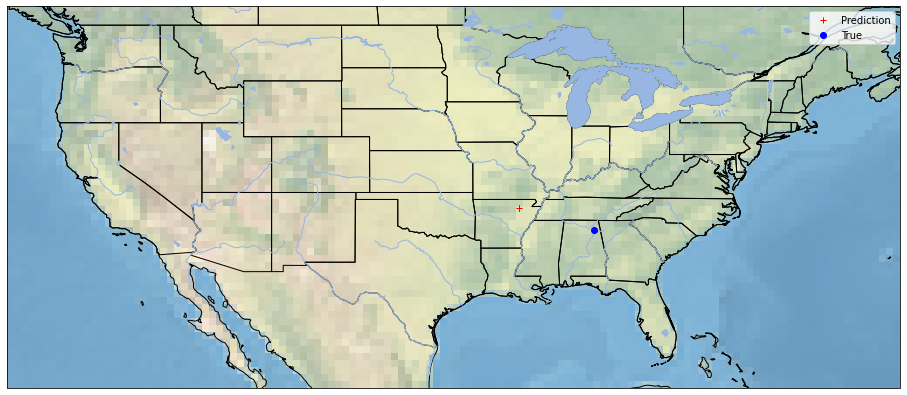

In [83]:
N_valid = X_valid.shape[0]
i = randrange(N_valid)

# Predicted
latp = lat_preds[i]
lonp = lon_preds[i]

# True
latt = y_valid.iloc[i]["LATITUDE"]
lont = y_valid.iloc[i]["LONGITUDE"]


map_extents = [-128, -64, 23, 46]

fig = plt.figure(figsize=(16, 16))

geo_ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
geo_ax.set_extent(map_extents)

geo_ax.stock_img()
geo_ax.coastlines()
geo_ax.add_feature(cfeature.STATES)
geo_ax.add_feature(cfeature.LAKES)
geo_ax.add_feature(cfeature.RIVERS)

geo_ax.plot(lonp, latp, 'r+')
geo_ax.plot(lont, latt, 'bo')
geo_ax.legend(("Prediction", "True"))